<a href="https://colab.research.google.com/github/sayarghoshroy/Language-Modelling/blob/master/language_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# tokenizer implemented using regex from scratch
# implementation of language modelling algorithm
# with Kneser-Ney Smoothing and interpolation in Python
# N-grams upto order 6 have been considered
# model perplexity computation
# Sentence generation using language models

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import copy

In [0]:
regex_dict = {
    'url_regex_a' : "(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?",
    'url_regex_b' : "(http|ftp|https)://\w*.\w*/\w*",
    'mention_regex' : "@.+",
    'dollar_regex' : "$[0-9]+\.?[0-9]*",
    'rupee_regex' : "Rs\.[0-9]*\.?[0-9]*",
    'hashtag_regex' : "#.+",
    'number_regex' : "[0-9]*[0-9\.][0-9]+",
    'number_comma_regex' : "([0-9]*\,?[0-9]+)+",
    'email_regex' : "'\S+@\S+'",
    'name_regex' : "(Mr\.|Mrs\.|Ms\.|Smt\.|Shri\.|Sri\.|Shree\.)[a-zA-Z]*",
    'name_middle' : "[A-Z]\."
}

In [0]:
def check(unit):
    for regex in regex_dict.values():
        if re.match(regex, unit):
            return True
    return False

In [0]:
# filename = sys.argv[1]
# access the filename as a command line argument
filename = 'corpus3.txt'
fp = open(filename)
file_string = fp.read()

In [0]:
sentence_list = file_string.split('\n')

In [0]:
# Building the Language Model
def generate_ngrams(tokenized_list, n):
    temp_list = copy.deepcopy(tokenized_list)
    complete_list = []
    for sentence_tokens in temp_list:
        for counter in range(0, n - 1):
            sentence_tokens.insert(0, '<s>')
            sentence_tokens.append('</s>')
        size = len(sentence_tokens)
        ngram_list = [sentence_tokens[i: i + n] for i in range(size - (n - 1))]
        complete_list = complete_list + ngram_list

    return complete_list

def find_ngrams(tokens, n):
    size = len(tokens)
    ngram_list = [tokens[i: i + n] for i in range(size - (n - 1))]
    return ngram_list

In [0]:
tokenized_string = ""
# the final output

tokenized_sentences = []

frequencies = [[], { }, { }, { }, { }, { }, { }]
# to store N-gram counts for N in {1, 2, 3, 4, 5, 6}

def tokenize_sentence(sentence):
    units = sentence.split(" ")
    tokens = []
    for unit in units:
        if check(unit):
            tokens.append(unit)
                
            continue
        
        divider = re.findall(r"[\w']+|[’.,!?;-~`]", unit)
        for elem in divider:
            if elem == '':
                continue

            if "\"" in elem:
                storage = elem.split("\"")
                for item in storage:
                    if "\'" in item:
                        new_storage = item.split("\'")
                        for item_sep in new_storage:
                            tokens.append(item_sep)
                            tokens.append("\'")
                        tokens.pop()
                    else:
                        tokens.append(item)
                        tokens.append("\"")
                tokens.pop()
                            
            elif "\'" in elem:
                new_storage = elem.split("\'")
                for item_sep in new_storage:
                    tokens.append(item_sep)
                    tokens.append("\'")
                tokens.pop()

            else:
                tokens.append(elem)
    return tokens

for sentence in sentence_list:
    units = sentence.split(" ")
    tokens = tokenize_sentence(sentence)
    if len(tokens) == 1 and tokens[0] == '' or tokens == []:
        continue
    
    for token in tokens:
        if token in frequencies[1]:
            frequencies[1][token] += 1
        else:
            frequencies[1][token] = 1
        tokenized_string = tokenized_string + " " + str(token)
    
    tokenized_sentences.append(tokens)
        
all_tokens = tokenized_string.split(' ')

In [0]:
# 'Uncomment the lines to create a file containing all tokenized sentences from corpus 4
#f_tokens_4 = open("corpus_4_tokens.txt","w+")
for sentence_sep in tokenized_sentences:
    output_line  = ""
    for unit in sentence_sep:
        if unit == " ":
            continue
        output_line = output_line + unit.strip() + " "
    output_line = re.sub(r"  ", r" ", output_line)
    #print(output_line)
    
    #f_tokens_4.write(output_line.strip())
    #f_tokens_4.write("\n")
#f_tokens_4.close()

In [0]:
N_gram_collections = [ [] ]
for N in range(1, 7):
    N_gram_collections.append(generate_ngrams(tokenized_sentences[:], N))
        
# Compute Frequencies of N-grams for N on {2, 3, 4, 5, 6}
# Preprocesing
for N in range(2, 7):
    for gram in N_gram_collections[N]:
        key = tuple(gram)
        if key in frequencies[N]:
            frequencies[N][key] += 1
        else:
            frequencies[N][key] = 1

In [0]:
# Uncomment to display generated 5-grams
# print(generate_ngrams(tokenized_sentences, 5))

In [0]:
# The language model is the collection of frequencies of all N-grams
# Here, N is in the range (1, 2, 3, 4, 5, 6)
# Hence, the 'frequencies' component stores all necessary information for the LM
# Storing it in a file

fp = open("LM", "w+")
fp.write(str(frequencies))
fp.close()

In [0]:
# Uncomment to view the tokenized text
#print(tokenized_string)

In [14]:
not_word = ['.', ',', '!', '?', ';', ':', '/', '\\', '(', ')', ' ', '\n', '']
word_id = []
frequency = []
count = 1
for key, value in sorted(frequencies[1].items(), key = lambda kv: kv[1], reverse = True):
    if key in not_word:
        continue
    word_id.append(count)
    frequency.append(value)
    count += 1
print("Number of tokens in corpus:", count)

Number of tokens in corpus: 7171


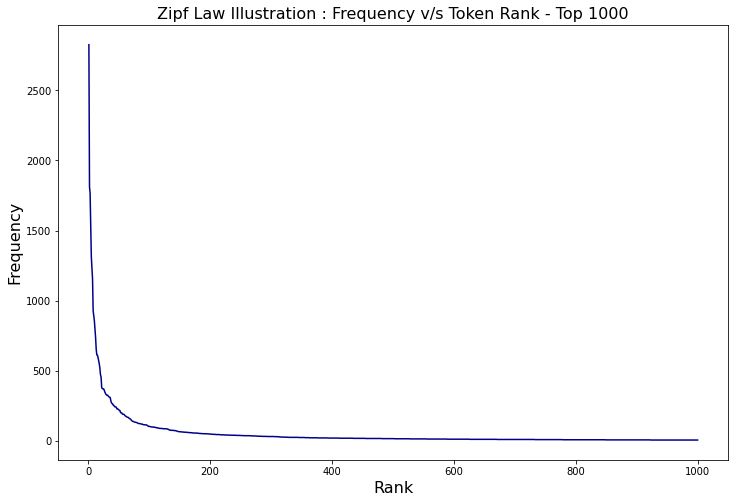

In [15]:
# Drawing a Frequency v/s Token Rank Graph
num = 1000 # Number of values to consider for Frequency v/s Word Rank Plot
x = word_id[:num]
y = frequency[:num]

plt.figure(figsize = (12, 8))
plt.title("Zipf Law Illustration : Frequency v/s Token Rank - Top 1000", fontsize = 16)
plt.xlabel("Rank", fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.plot(x, y, color = 'darkblue')
# plt.savefig('less_EN.png')
plt.show()

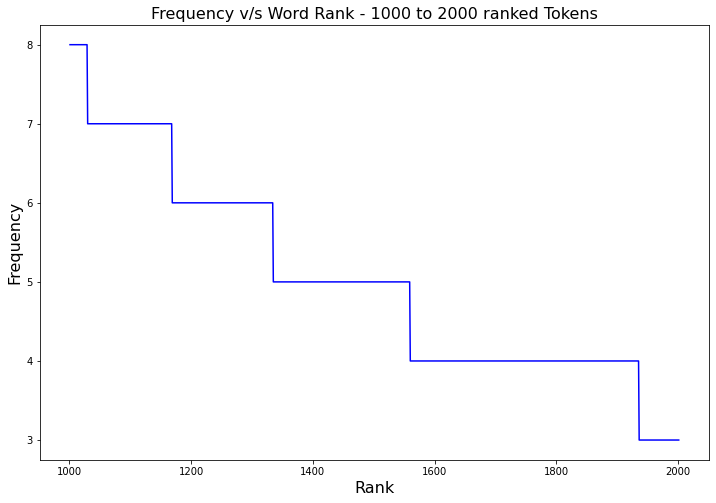

In [16]:
# Plot for 1000 to 2000 ranked Tokens
x = word_id[1000: 2001]
y = frequency[1000: 2001]

plt.figure(figsize = (12, 8))
plt.title("Frequency v/s Word Rank - 1000 to 2000 ranked Tokens", fontsize = 16)
plt.xlabel("Rank", fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.plot(x, y, 'blue')
# plt.savefig('more_EN.png')
plt.show()

In [17]:
def P_Kneser_Ney(word, previous_words, is_top):
    # I want an ice-cream. word: "ice-cream", previous_words = ["I", "want", "an"]
    # Base Case
    if previous_words == []:
        if is_top == 1:
            count = 0
            if word in frequencies[1]:
                count = frequencies[1][word]
            return (count / len(all_tokens))
        else:
            numerator_base = 0
            for key in frequencies[2]:
                if key[1] == word:
                    numerator_base += 1
            #print("Numerator_base :", numerator_base)
            return (numerator_base / len(frequencies[2]))
            
    
    delta = 0.7
    words = [token for token in previous_words]
    words.append(word)
    
    # Computing the numerator
    look_at_all = len(words)
    look_at_prev = len(previous_words)
    key = tuple(words)
    
    if is_top == 1:
        numerator_A = 0
        if key in frequencies[look_at_all]:
            numerator_A = max(frequencies[look_at_all][key] - delta, 0)
    else:
        numerator_A = 0
        checker = tuple(words[1:])
        if(len(key) == 1):
            key = key[0]
        for key in frequencies[look_at_all]:
            if (tuple(list(key)[1: len(list(key))]) == checker):
                numerator_A += 1
        #print(numerator_A)
    
    # Computing the Denominator
    key = tuple(previous_words)
    if(len(key) == 1):
        key = key[0]
    
    if is_top == 1:
        denominator = 0
        if key in frequencies[look_at_prev]:
            denominator = frequencies[look_at_prev][key]
        else:
            denominator = 1
    else:
        denominator = len(frequencies[look_at_all])
    
    numerator_B = 0
    for key in frequencies[look_at_all]:
        if (tuple(list(key)[0: len(list(key)) - 1]) == (tuple(previous_words))):
            numerator_B += 1
            
    if denominator == 0:
        denominator = 1
    
    if numerator_B == 0:
        return (numerator_A / denominator)
    
    return (numerator_A / denominator) + delta * (numerator_B / denominator) * P_Kneser_Ney(word, previous_words[1:], 0)
    
    
P_Kneser_Ney('not', ['This', 'must'], 1)

0.3011867444638436

In [0]:
def prob_perplexity_sentence(sentence, gram_size):
    if(gram_size > 6):
        gram_size = 6
    elif(gram_size < 1):
        gram_size = 1
        
    tokens = tokenize_sentence(sentence)
    n_grams_generated = find_ngrams(tokens, gram_size)

    probability = 1
    perplex_sum = 0
    
    for gram in n_grams_generated:
        word = gram[len(gram) - 1]
        previous_words = gram[0: len(gram) - 1]
        probability *= P_Kneser_Ney(word, previous_words, 1)
        if probability == 0:
            continue
        perplex_sum -= (probability * np.log(probability) / np.log(2))
    
    perplexity = np.power(2, perplex_sum)
    
    return({'sentence' : sentence, 'probability' : probability, 'perplexity' : perplexity})

In [19]:
# Play around with various strings with a corresponding maximum N-gram length
print(prob_perplexity_sentence("including India.", 2))

{'sentence': 'including India.', 'probability': 0.09806155456408601, 'perplexity': 1.80212892123132}


In [0]:
def generate(gram_size, rcvd_key):
    key = rcvd_key
    sentence = rcvd_key[gram_size - 1] + " "
    length = 0
    
    while(key[gram_size - 1] != '</s>'):
        new_key_init = []
        for i in range(1, gram_size):
            new_key_init.append(key[i])
            
        consider_keys = []
        
        for key_iter in frequencies[gram_size]:
            if tuple(list(key_iter)[0: len(rcvd_key) - 1]) == tuple(new_key_init):
                consider_keys.append(key_iter)
                
        build_dict = {}
        for key in consider_keys:
            build_dict[key] = frequencies[gram_size][key]
        
        key_next = 0
        for key_take, value in sorted(build_dict.items(), key = lambda kv: kv[1], reverse = True):
            key_next = key_take
            if key_next[gram_size - 1] != "</s>":
                sentence = sentence + " " + key_next[gram_size - 1]
            break
        key = key_next
        length += 1
        if length == 20:
            break
    sentence = re.sub(r"  ", r" ", sentence)
    print(sentence)

def generate_init(gram_size, create):
    # generates a set of 'create' sentences considering the language model of the given gram_size
    if(gram_size > 6):
        gram_size = 6
    elif(gram_size < 1):
        gram_size = 1
    if gram_size == 1:
        count = 10
        for key, value in sorted(frequencies[1].items(), key = lambda kv: kv[1], reverse = True):
            print(key)
            count -= 1
            if(count <= 0):
                return
    init = []
    for i in range(gram_size - 1):
        init.append('<s>')
    consider_keys = []
    for key in frequencies[gram_size]:
        if tuple(list(key)[0: len(key) - 1]) == tuple(init):
            consider_keys.append(key)
            #print(key)
            
    build_dict = {}
    for key in consider_keys:
        build_dict[key] = frequencies[gram_size][key]
        
    count = min(create, 25)
    for key, value in sorted(build_dict.items(), key = lambda kv: kv[1], reverse = True):
        generate(gram_size, key)

        count -= 1
        if(count <= 0):
            break

In [21]:
# Generate Sentences using a maximum N-gram size as argument
generate_init(5, 20)

He is a well off person .
I am not going to answer the question .
The boy is being brave .
How many people are about to come in this party ?
What is the name of this thing ?
You are not the first man that has been deceived by appearances .
We are not working .
She is not going to work out .
They are not going to walk in the mountains .
Will you be able to spare time for me ?
It is a very good example of social service .
This is the boy whose pencil I have .
There is a cow in the field .
A girl eats an apple .
John is giving bananas , Saidi oranges .
My sister , who works in IT , is coming to visit me tomorrow .
If you had left that wasp alone it might not have stung you .
Does he know that you love him ?
Which is the best book ?
Who did you give the book to ?


In [0]:
# Accepts a corpus as input and calculate perplexities of all its sentences
test_corpus = 'corpus3.txt'
f_test = open(test_corpus)
test_file_string = f_test.read()

test_sentence_list = test_file_string.split('\n')

In [23]:
count = 0
f_perplex = open("perplexity_scores", "w+")
avg_perplexities = [0, 0, 0, 0, 0, 0]
for N_gram_used in range(1, 7):
    sum = 0
    count = 0
    f_perplex.write("Perplexity Scores using N-gram Size = "+ str(N_gram_used) + "\n")
    for test_sentence in test_sentence_list:
        unit = prob_perplexity_sentence(test_sentence, N_gram_used)
        string_to_write = test_sentence + "\t" + str(unit['perplexity']) + "\n"
        f_perplex.write(string_to_write)
        sum += unit['perplexity']
        count += 1
        if(count > 10):
            break
    avg_perplexities[N_gram_used - 1] = sum / count
    f_perplex.write("Average Perplexity : " + str(sum / count) + "\n")
print("Average Perplexities using various sized N-grams:", avg_perplexities)
f_perplex.close()

Average Perplexities using various sized N-grams: [1.0381730218581977, 1.1825251861497608, 1.5340727778755736, 1.694116831502953, 1.681301153192944, 1.5338029311263925]


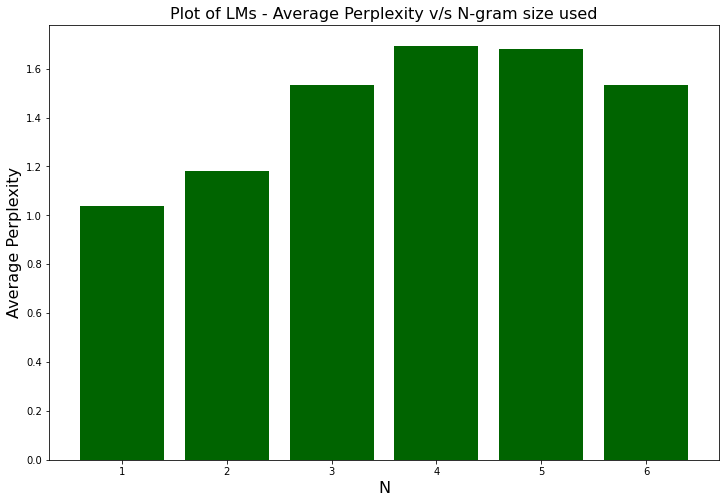

In [24]:
# Plot for the generated language models
# Unigram, Bigram, Trigram, ... , 6-gram
x = [i for i in range(1, 7)]
y = avg_perplexities[0:]

plt.figure(figsize = (12, 8))
plt.title("Plot of LMs - Average Perplexity v/s N-gram size used", fontsize = 16)
plt.xlabel("N", fontsize = 16)
plt.ylabel('Average Perplexity', fontsize = 16)
plt.bar(x, y, color = 'darkgreen')
# plt.savefig('perplexity_en.png')
plt.show()

In [0]:
#  ^_^ Thank You
# Author: Sayar Ghosh Roy